Assignment 01 Report

1. Linearregression impact on outliers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
plt.rcParams.update({"figure.figsize": (8,5), "font.size": 12})

# Table 1 (given)
df = pd.DataFrame({
    "x": np.array([0,1,2,3,4,5,6,7,8,9], dtype=float),
    "y": np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03], dtype=float)
})
df

,x,y
0,0.0,20.26
1,1.0,5.61
2,2.0,3.14
3,3.0,-30.00
4,4.0,-40.00
5,5.0,-8.13
6,6.0,-11.73
7,7.0,-16.08
8,8.0,-19.95
9,9.0,-24.03


Linear Regression Model: y = -3.5573x + 3.9167


d:\Cursor Document\Pattern-Recognition-Assignment-01\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


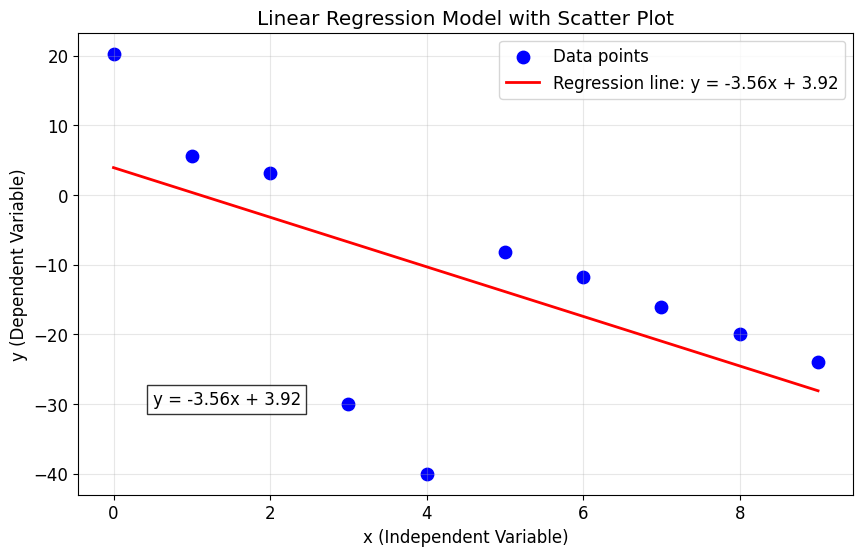


Model Parameters:
Slope (a): -3.557273
Intercept (b): 3.916727
Model Equation: y = -3.5573*x + 3.9167


In [4]:
# Create and fit the linear regression model
reg = LinearRegression()
reg.fit(df[["x"]], df.y)

# Get the coefficients (a = slope, b = intercept)
a, b = reg.coef_[0], reg.intercept_
print(f"Linear Regression Model: y = {a:.4f}x + {b:.4f}")

# Generate predictions for plotting the line
x_range = np.linspace(df['x'].min(), df['x'].max(), 100)
y_pred = reg.predict(x_range.reshape(-1, 1))

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of original data
plt.scatter(df['x'], df['y'], color='blue', label='Data points', s=80)

# Plot the regression line
plt.plot(x_range, y_pred, color='red', linewidth=2, 
         label=f'Regression line: y = {a:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('x (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.title('Linear Regression Model with Scatter Plot')
plt.legend()
plt.grid(True, alpha=0.3)

# Add the model equation as text on the plot
plt.text(0.5, -30, f'y = {a:.2f}x + {b:.2f}', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print the model details
print(f"\nModel Parameters:")
print(f"Slope (a): {a:.6f}")
print(f"Intercept (b): {b:.6f}")
print(f"Model Equation: y = {a:.4f}*x + {b:.4f}")

In [5]:
def robust_loss(y_true, y_pred, beta):
    e2 = (y_true - y_pred)**2
    return np.mean(e2 / (e2 + beta**2))

models = {
    "Model 1": (-4.0, 12.0),       # slope, intercept
    "Model 2 (learned)": (-3.55, 3.91)
}

betas = [1.0, 1e-6, 1e3]
rows = []

for name, (a, b) in models.items():
    y_hat = a * df["x"].to_numpy() + b
    for beta in betas:
        L = robust_loss(df["y"].to_numpy(), y_hat, beta)
        rows.append({"Model": name, "beta": beta, "L(theta,beta)": L})

robust_df = pd.DataFrame(rows)
robust_df


,Model,beta,"L(theta,beta)"
0,Model 1,1.000000,0.435416
1,Model 1,0.000001,1.000000
2,Model 1,1000.000000,0.000227
3,Model 2 (learned),1.000000,0.972847
4,Model 2 (learned),0.000001,1.000000
5,Model 2 (learned),1000.000000,0.000188


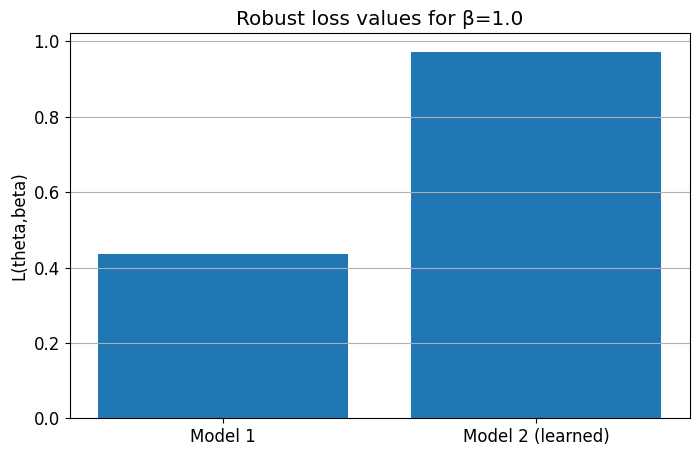

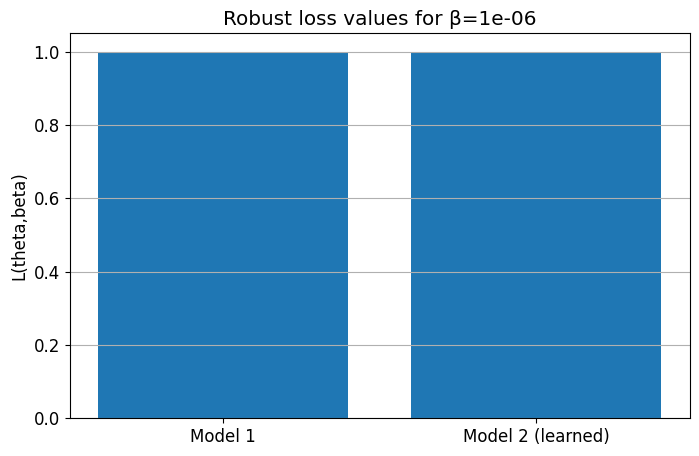

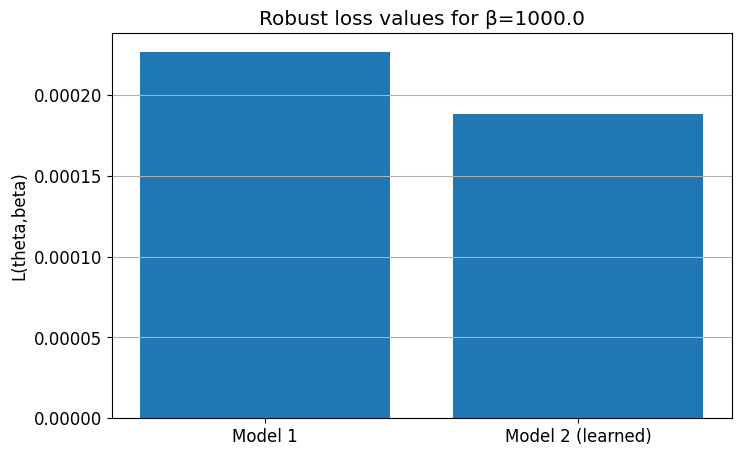

In [6]:
for beta in betas:
    subset = robust_df[robust_df["beta"] == beta]
    plt.bar(subset["Model"], subset["L(theta,beta)"])
    plt.title(f"Robust loss values for β={beta}")
    plt.ylabel("L(theta,beta)")
    plt.grid(True, axis="y")
    plt.show()


In [7]:

def huber_loss(y_true, y_pred, delta=1.0):
    e = y_true - y_pred
    abs_e = np.abs(e)
    quad = 0.5 * (e**2)
    lin = delta * (abs_e - 0.5*delta)
    return np.mean(np.where(abs_e <= delta, quad, lin))

deltas = [0.1, 1.0, 5.0]

models = {
    "Model 1": (-4.0, 12.0),
    "Model 2 (learned)": (-3.55, 3.91)
}

rows = []
x = df["x"].to_numpy(); y = df["y"].to_numpy()
for name, (a,b) in models.items():
    yhat = a*x + b
    for d in deltas:
        rows.append({"Model": name, "delta": d, "Huber": huber_loss(y, yhat, d)})

pd.DataFrame(rows)


,Model,delta,Huber
0,Model 1,0.1,0.776090
1,Model 1,1.0,7.506960
2,Model 1,5.0,33.707565
3,Model 2 (learned),0.1,1.051800
4,Model 2 (learned),1.0,10.068000
5,Model 2 (learned),5.0,40.400565


2. Loss Function

In [10]:
# Given: true label is y = 1
y_true = 1.0

# Predictions grid to evaluate
yhat_vals = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                      0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

def mse_1sample(y, yhat):
    # single-sample MSE with the 1/2 factor (as commonly used in derivations)
    return (y - yhat)**2

def bce_1sample(y, yhat, eps=1e-12):
    # binary cross-entropy (negative log-likelihood for Bernoulli)
    yhat = np.clip(yhat, eps, 1 - eps)
    return -(y*np.log(yhat) + (1-y)*np.log(1 - yhat))

tbl = pd.DataFrame({
    "True y": [1]*len(yhat_vals),
    "Prediction ŷ": yhat_vals,
    "MSE": [mse_1sample(y_true, v) for v in yhat_vals],
    "BCE": [bce_1sample(y_true, v) for v in yhat_vals],
})
tbl


,True y,Prediction ŷ,MSE,BCE
0,1,0.005,0.990025,5.298317e+00
1,1,0.010,0.980100,4.605170e+00
2,1,0.050,0.902500,2.995732e+00
3,1,0.100,0.810000,2.302585e+00
4,1,0.200,0.640000,1.609438e+00
5,1,0.300,0.490000,1.203973e+00
6,1,0.400,0.360000,9.162907e-01
7,1,0.500,0.250000,6.931472e-01
8,1,0.600,0.160000,5.108256e-01
9,1,0.700,0.090000,3.566749e-01


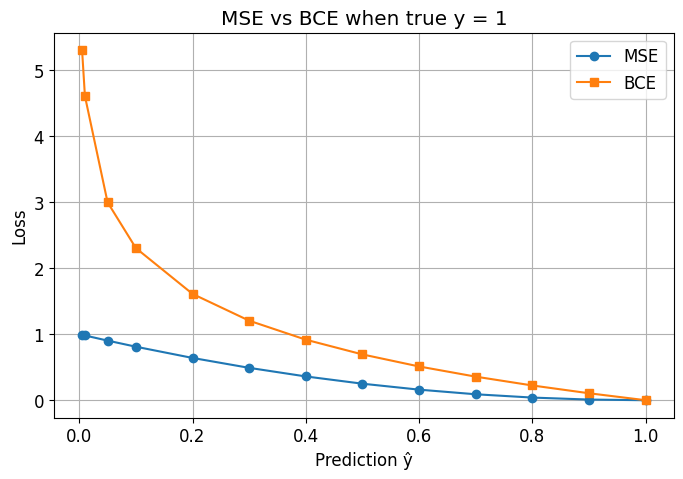

In [11]:
plt.plot(tbl["Prediction ŷ"], tbl["MSE"], marker="o", label="MSE")
plt.plot(tbl["Prediction ŷ"], tbl["BCE"], marker="s", label="BCE")
plt.xlabel("Prediction ŷ"); plt.ylabel("Loss")
plt.title("MSE vs BCE when true y = 1")
plt.grid(True); plt.legend(); plt.show()


3. Data pre-processing

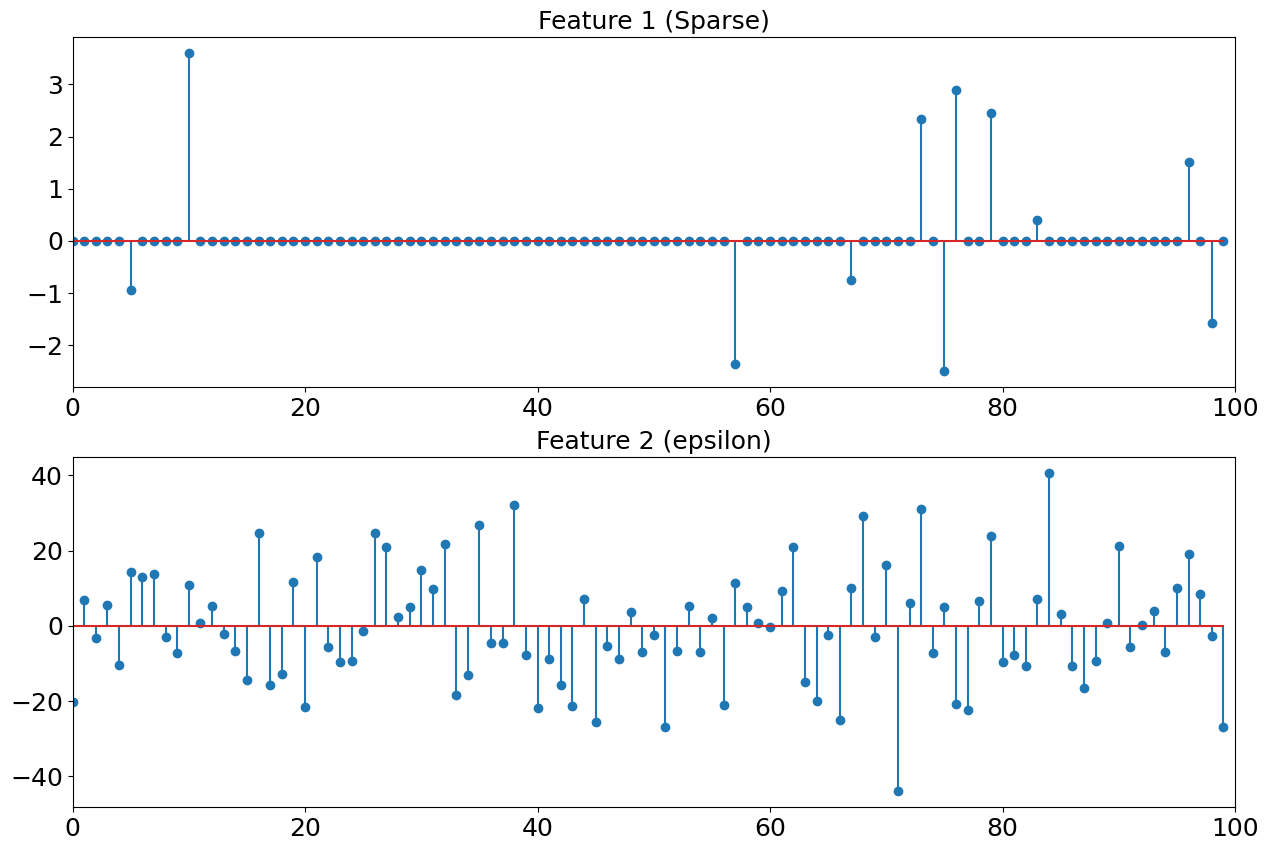

In [19]:
def generate_signal(signal_length, num_nonzero):
 signal = np.zeros(signal_length)
 nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
 nonzero_values = 10*np.random.randn(num_nonzero)
 signal[nonzero_indices] = nonzero_values
 return signal
signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the signal


your_index_no= 220004 # my index no without english letters and without leading zeros


sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10

if your_index_no % 10 == 0:
   sparse_signal[10] = np.random.randn(1) + 30
sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length )


#epsilon=epsilon[:, np.newaxis]
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Sparse)", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 (epsilon)", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()



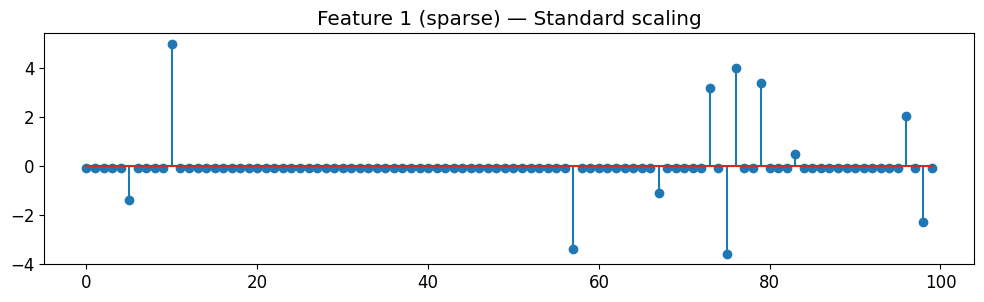

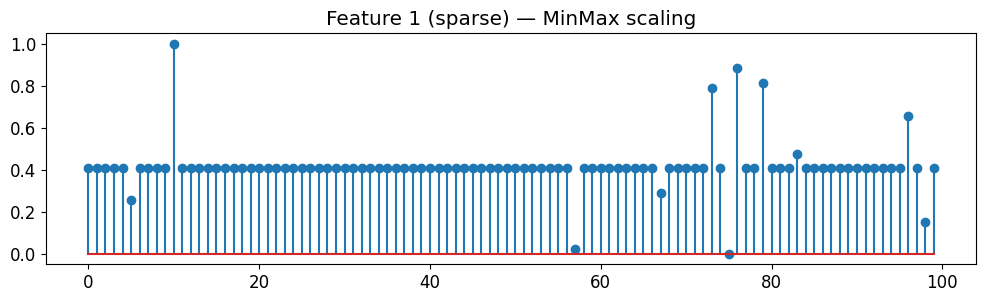

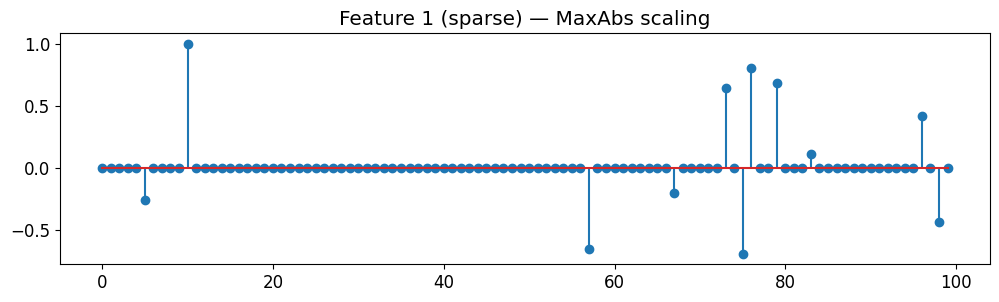

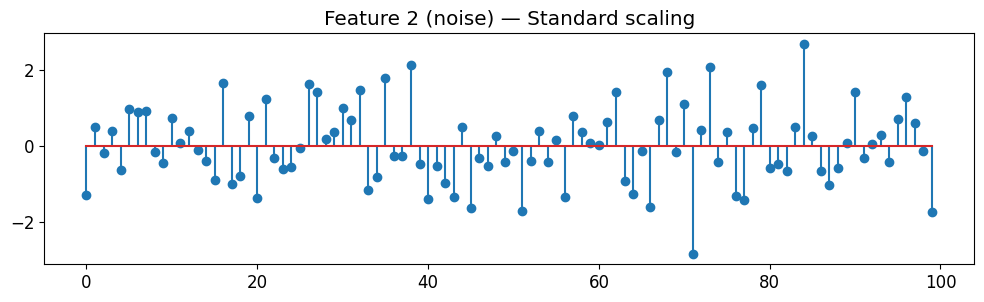

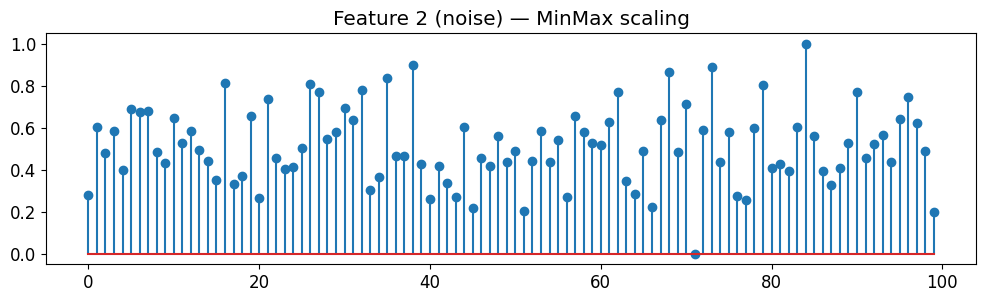

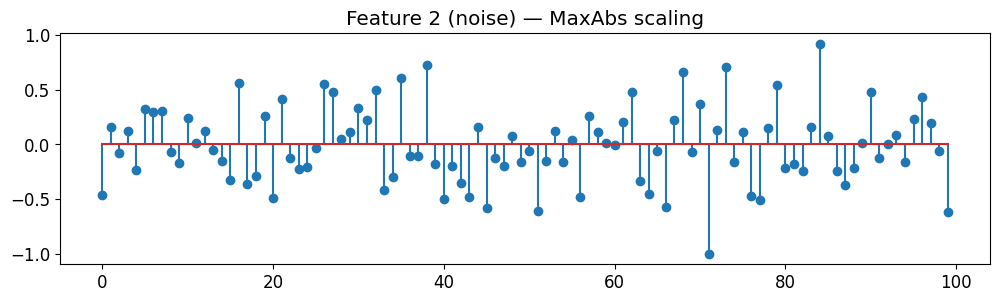

In [20]:
def standard_scale(x):
    mu, sigma = np.mean(x), np.std(x)
    sigma = sigma if sigma > 0 else 1.0
    return (x - mu) / sigma

def minmax_scale(x):
    xmin, xmax = np.min(x), np.max(x)
    rng = xmax - xmin if xmax > xmin else 1.0
    return (x - xmin) / rng

def maxabs_scale(x):
    m = np.max(np.abs(x))
    m = m if m > 0 else 1.0
    return x / m

scalers = {
    "Standard": standard_scale,
    "MinMax": minmax_scale,
    "MaxAbs": maxabs_scale
}

features = {
    "Feature 1 (sparse)": sparse_signal,
    "Feature 2 (noise)": epsilon
}

# Apply and visualize all scalers per feature
for fname, fvals in features.items():
    for sname, sfunc in scalers.items():
        scaled = sfunc(fvals)
        fig, ax = plt.subplots(figsize=(12,3))
        ax.stem(scaled)
        ax.set_title(f"{fname} — {sname} scaling")
        plt.show()
